<a href="https://colab.research.google.com/github/Krishnaads/MLProject/blob/main/SeoulBike_PredictionDay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [10]:
df=pd.read_csv('/content/drive/MyDrive/DataScience Projects/SeoulBikeData.csv',encoding='unicode_escape')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [13]:
df.duplicated().sum() #To check if any duplicated data is present in the dataset and indicates no duplicate data available as per output=0

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

It can be inferred that there are no null datasets in any of the rows present in above dataset. The problem state will be predicting the bike demand based on given factors

In [35]:
def datainfo(data):
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100
    return temp_ps
datainfo(df)

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
Date,datetime64[ns],8760,365,0,0.0
Rented Bike Count,int64,8760,2166,0,0.0
Hour,int64,8760,24,0,0.0
Temperature(°C),float64,8760,546,0,0.0
Humidity(%),int64,8760,90,0,0.0
Wind speed (m/s),float64,8760,65,0,0.0
Visibility (10m),int64,8760,1789,0,0.0
Dew point temperature(°C),float64,8760,556,0,0.0
Solar Radiation (MJ/m2),float64,8760,345,0,0.0
Rainfall(mm),float64,8760,61,0,0.0


In [17]:
from datetime import datetime

In [19]:
df['Date']=pd.to_datetime(df['Date'],format='%d/%m/%Y')  #Coverting datatype of date column to datetime format

In [29]:
num_list=df.select_dtypes(include=['int64','float64'])
cat_list=df.select_dtypes(include='object')
print('Numerical category list is:',num_list)
print('Categorical category list is:',cat_list)

Numerical category list is:       Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0             -5.2           37               2.2   
1                   204     1             -5.5           38               0.8   
2                   173     2             -6.0           39               1.0   
3                   107     3             -6.2           40               0.9   
4                    78     4             -6.0           36               2.3   
...                 ...   ...              ...          ...               ...   
8755               1003    19              4.2           34               2.6   
8756                764    20              3.4           37               2.3   
8757                694    21              2.6           39               0.3   
8758                712    22              2.1           41               1.0   
8759                584    23              1.9           43               1.3   


ConversionError: ignored

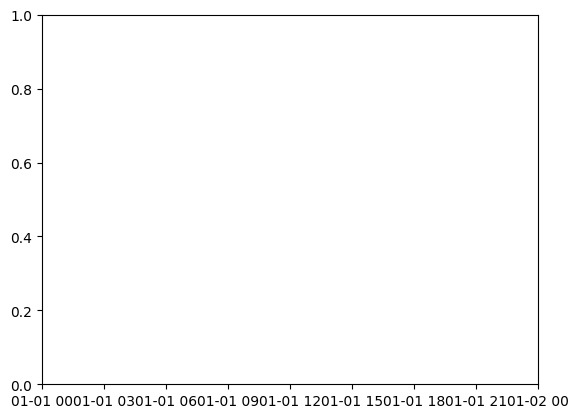

In [34]:
#Performing EDA on dataset-a.univariate analysis
